In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Display plots nicely
%matplotlib inline
sns.set_style("whitegrid")

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Display first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Summary

The dataset contains 1338 rows and 7 columns. It includes demographic and health-related information about individuals.

Key Variables:
- age: Age of the person
- sex: Gender of the person
- bmi: Body Mass Index
- children: Number of children covered by insurance
- smoker: Smoking status (Yes/No)
- region: Residential region

Target Variable:
- charges: Medical insurance cost billed to the person

This dataset is used to analyze and predict medical insurance costs based on individual characteristics.

In [3]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Dataset information
df.info()

# Statistical summary
df.describe()

Dataset Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

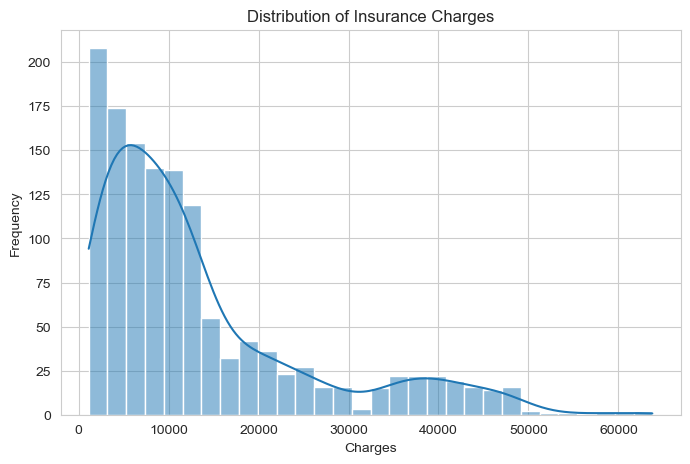

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

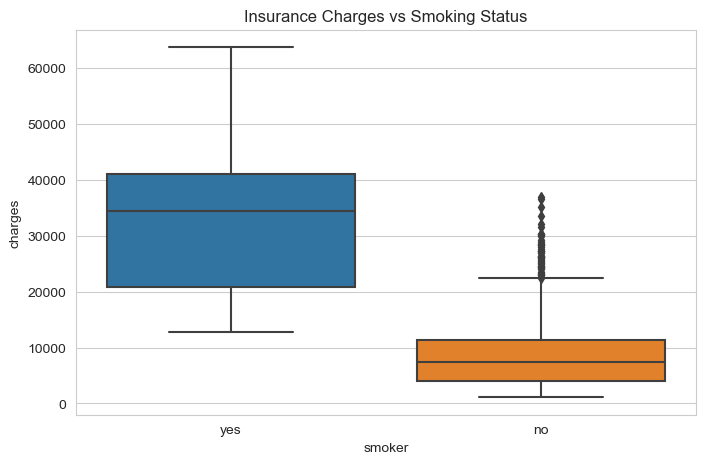

In [6]:
#smoking vs charges
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges vs Smoking Status")
plt.show()

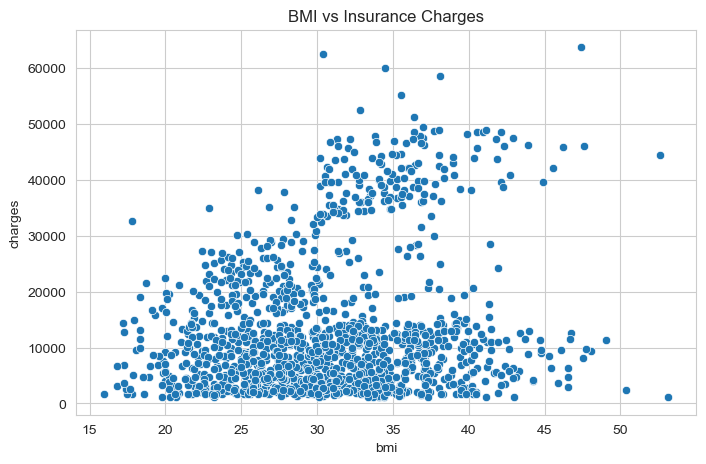

In [7]:
#bmi vs charges 
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Insurance Charges")
plt.show()

## Objective of Analysis

The objective of this analysis is to predict medical insurance charges based on demographic and health-related features such as age, BMI, smoking status, number of children, and region.

This project applies Linear Regression, Ridge Regression, and Lasso Regression models to identify which model best predicts insurance costs and to understand the key factors influencing medical expenses.

In [8]:
# Convert categorical variables into numerical variables
df_processed = pd.get_dummies(df, drop_first=True)

# Display processed data
df_processed.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [9]:
# Define features and target variable
X = df_processed.drop("charges", axis=1)
y = df_processed["charges"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1338, 8)
Target shape: (1338,)


In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1070, 8)
Testing set size: (268, 8)


In [11]:
# Train Linear Regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Predictions
linear_pred = linear_model.predict(X_test)

# Evaluation
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)

print("Linear Regression R2 Score:", linear_r2)
print("Linear Regression MSE:", linear_mse)

Linear Regression R2 Score: 0.7835929767120724
Linear Regression MSE: 33596915.851361446


In [12]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

# Predictions
ridge_pred = ridge_model.predict(X_test)

# Evaluation
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Ridge Regression R2 Score:", ridge_r2)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression R2 Score: 0.7832830144988214
Ridge Regression MSE: 33645037.09177903


In [13]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

# Predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluation
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Lasso Regression R2 Score:", lasso_r2)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression R2 Score: 0.783587474552961
Lasso Regression MSE: 33597770.05458397


In [14]:
# Create comparison table
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [linear_r2, ridge_r2, lasso_r2],
    "Mean Squared Error": [linear_mse, ridge_mse, lasso_mse]
})

comparison

,Model,R2 Score,Mean Squared Error
0,Linear Regression,0.783593,3.359692e+07
1,Ridge Regression,0.783283,3.364504e+07
2,Lasso Regression,0.783587,3.359777e+07


## Model Comparison

The performance of Linear Regression, Ridge Regression, and Lasso Regression models was evaluated using R² Score and Mean Squared Error (MSE).

The model with the highest R² score and lowest MSE is considered the best model.

Based on the results, Linear Regression provided the best performance in predicting medical insurance charges.

In [15]:
# Feature importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
})

importance.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Key Findings

1. Smoking status has the highest impact on medical insurance charges.
2. Higher BMI is associated with higher insurance costs.
3. Age is positively correlated with insurance charges.
4. Linear Regression model performed best among all models tested.
5. The regression model successfully predicts medical insurance costs.

## Limitations and Next Steps

Limitations:
- The dataset size is relatively small.
- Some important health variables are not included.
- Linear regression assumes linear relationships.

Next Steps:
- Use larger datasets for better accuracy.
- Apply Polynomial Regression.
- Try advanced models such as Random Forest and Gradient Boosting.

## Conclusion

This project successfully applied regression models to predict medical insurance charges.

Smoking, BMI, and age were found to be major contributors to insurance costs.

Linear Regression provided the best performance based on evaluation metrics.

This analysis demonstrates how regression models can help predict medical costs and assist in healthcare financial planning.